In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df_calib_0212 = pd.read_csv(r"F:\bicwin26\Summary\calibration_IR\calibration_Tourterelle_0212.csv",sep=";")
df_calib_0209 = pd.read_csv(r"F:\bicwin26\Summary\calibration_IR\calibration_Tourterelle_0209.csv",sep=";")

def convert_to_float(value):
    if type(value) == float:
        return value
    else:
        return float(value.replace(',', '.'))

T_IR_celsius_0212 = np.zeros(len(df_calib_0212['T_IR_celsius'].values))
T_ref_thermometrecuisine_0212 = np.zeros(len(df_calib_0212['T_thermometre_cuisine'].values))

for i in range(len(df_calib_0212['T_IR_celsius'].values)):
    
    T_IR_celsius_0212[i] = convert_to_float(df_calib_0212['T_IR_celsius'].values[i])
    T_ref_thermometrecuisine_0212[i] = convert_to_float(df_calib_0212['T_thermometre_cuisine'].values[i])

surface_0212 = df_calib_0212['surface'].values

T_IR_celsius_0209 = np.zeros(len(df_calib_0209['T_IR_celsius'].values))
T_ref_SBE56_num1_celsius = np.zeros(len(df_calib_0209['T_ref_SBE56_num1_celsius'].values))
T_ref_SBE56_num2_celsius = np.zeros(len(df_calib_0209['T_ref_SBE56_num2_celsius'].values))

for i in range(len(df_calib_0209['T_IR_celsius'].values)):
    
    T_IR_celsius_0209[i] = convert_to_float(df_calib_0209['T_IR_celsius'].values[i])
    T_ref_SBE56_num1_celsius[i] = convert_to_float(df_calib_0209['T_ref_SBE56_num1_celsius'].values[i])
    T_ref_SBE56_num2_celsius[i] = convert_to_float(df_calib_0209['T_ref_SBE56_num2_celsius'].values[i])

surface_0209 = df_calib_0209['surface'].values

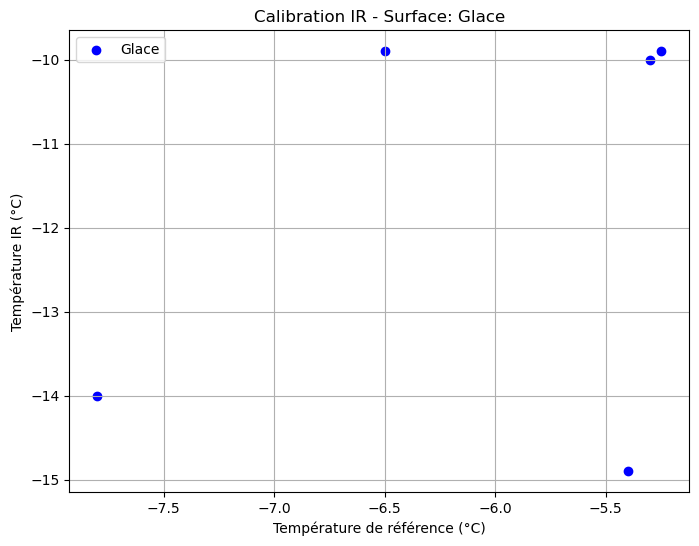

In [8]:
T_ref = np.concatenate((T_ref_thermometrecuisine_0212, np.nanmean([T_ref_SBE56_num1_celsius, T_ref_SBE56_num2_celsius], axis=0)))
T_IR = np.concatenate((T_IR_celsius_0212, T_IR_celsius_0209))
surface = np.concatenate((surface_0212, surface_0209))

idx2plot = np.where(surface == "glace")[0]
plt.figure(figsize=(8, 6))
plt.scatter(T_ref[idx2plot], T_IR[idx2plot], label='Glace', color='blue')
plt.xlabel('Température de référence (°C)')
plt.ylabel('Température IR (°C)')
plt.title('Calibration IR - Surface: Glace')
plt.legend()
plt.grid()
plt.show()